In [1]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from pycocotools.coco import COCO
from skimage.io import imread

In [2]:
data_dir = '../data'
data_type = 'val2017'

In [3]:
coco = COCO('{}/raw/annotations/instances_{}.json'.format(data_dir, data_type))
category_ids = coco.getCatIds(supNms=['person', 'vehicle'])

loading annotations into memory...
Done (t=0.72s)
creating index...
index created!


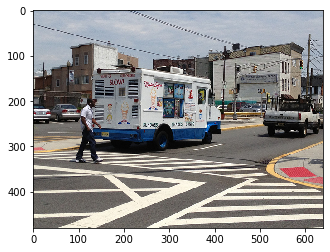

In [4]:
image_id = 393226
image_info = coco.loadImgs([image_id])[0]
image = imread('{}/raw/images/{}/{}'.format(data_dir, data_type, image_info['file_name']))
plt.imshow(image)

In [5]:
annotation_ids = coco.getAnnIds(imgIds=[image_id], catIds=category_ids)
annotations = coco.loadAnns(annotation_ids)

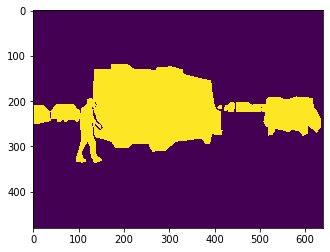

In [6]:
mask = np.zeros(image.shape[:2], dtype='uint8')
for annotation in annotations:
    mask = cv.bitwise_or(mask, coco.annToMask(annotation))
plt.imshow(mask)
    
    

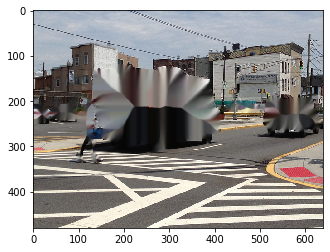

In [7]:
result = cv.inpaint(image, mask, 3, cv.INPAINT_NS)
plt.imshow(result)
    
    

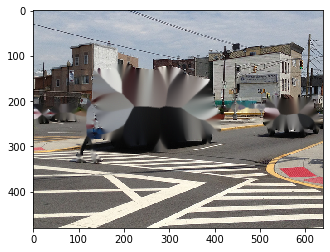

In [8]:
result = cv.inpaint(image, mask, 3, cv.INPAINT_TELEA)
plt.imshow(result)
